In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('dark')
%matplotlib inline

1. Pull mutated data from saved state

In [3]:
pickle_in = open("./data_state/recommender_state.pickle", "rb")
df = pickle.load(pickle_in)

2. Take a quick look at the head of the dataframe to ensure it is as expected

In [4]:
df.head()

,userId,movieId,rating,title,genres
timestamp,,,,,
964982703,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
847434962,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1106635946,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1510577970,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1305696483,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


3. We take a look at the number of unique users and movies in this dataset to get a feel for the size

In [5]:
num_users = len(df.userId.unique())
num_items = len(df.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 610 unique users and 9724 unique movies in this data set


4. We can gain an understanding of the reviews by grouping them together based on stars

In [6]:
pd.DataFrame(df.groupby('rating').size(), columns=['count'])

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


# The sparsity of data problem 
5. We can sort our movies by rating to see which are the highest rated movies however we'll soon find that a large number of movies have only a very small number of reviews. This is a problem because the mean rating of a movie rated 5 stars by a single review would be rated higher than the mean rating of a movie with 50 mixed reviews whereas your intuition might tell you that a movie that has 50 reviews that average 4.5 stars is likely to be a better movie than a movie that has a single 5 star review. 

We can see our movies sorted in descending order below.

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

6. If we were to sort our movies by the number of reviews you'll notice that popular movies that you might recognise as great are now at the top. Your intuition might tell you that popular movies are likely to be seen by more people and therefore attract a greater number of reviews and so this result is inline with what we might expect.

In [30]:
ratings_count = df.groupby('title')['rating'].count().sort_values(ascending=False).head()

7. We could summarise our data by grouping our movies together and taking a mean rating with a new column which showed a count of reviews

In [33]:
ratings_mean_count = pd.DataFrame(df.groupby('title')['rating'].mean())

In [34]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [35]:
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


8. We could plot a histogram for a visual representation of our reviews distribution. You'll see that the majority of our movies have less than 5 reviews.

Text(0.5, 0, 'number of reviews')

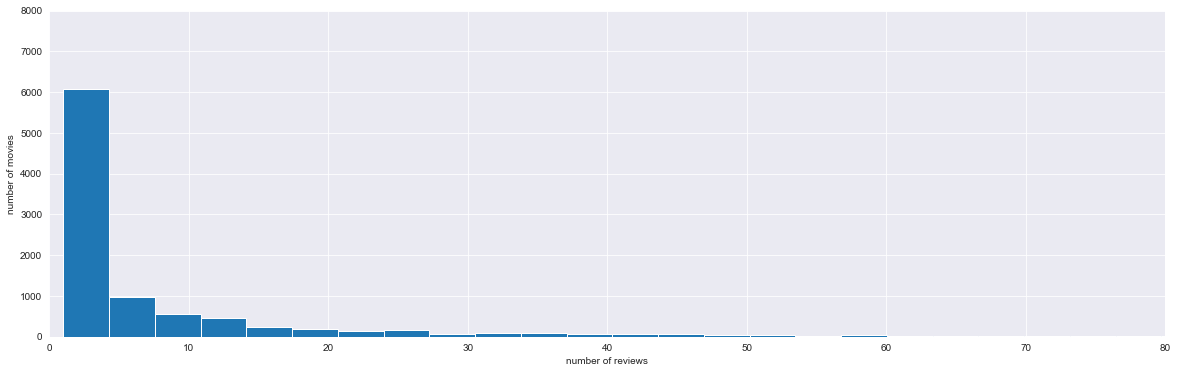

In [55]:
plt.figure(figsize=(20,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=100)
plt.ylabel('number of movies')
plt.axis([0, 80, 0, 8000])
plt.xlabel('number of reviews')

9. A histogram of our mean ratings shows that the majority of films score between 3 and 4 stars.

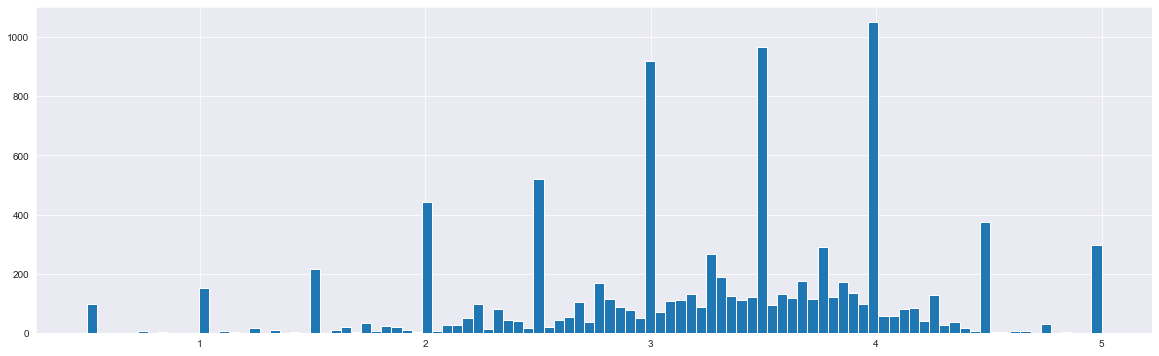

In [60]:
plt.figure(figsize=(20,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=100)

10. If we plot the mean rating against the number of ratings per movie we can see the bulk of our movies have received less than 50 reviews and have scored between 3 and 4 stars. As the number of reviews increases the general trend is for a movie to score higher. 

<Figure size 1440x432 with 0 Axes>

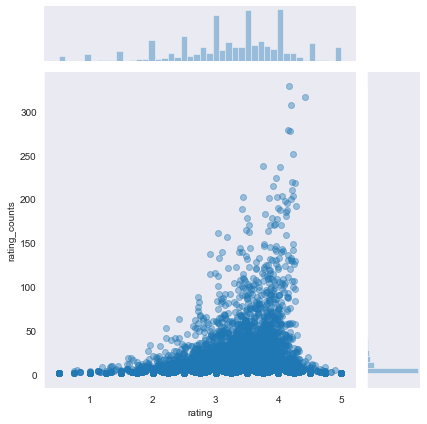

In [61]:
plt.figure(figsize=(20,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)